In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
#df=df.drop(['EmployeeNumber','EmployeeCount','StandardHours','Over18'],axis=1)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [3]:
#Binning
df['MonthlyIncome']=pd.cut(df['MonthlyIncome'],bins=4,labels=['Very low','Low','Moderate','High'])
#Binning
df['Age']=pd.cut(df['Age'],bins=3,labels=['Youth','Middle Aged','Elderly'])

In [4]:
df_num=df.select_dtypes(include=['int64','float'])
df_cat=df.select_dtypes(exclude=['int64','float'])
df_cat.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'Gender', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'Over18',
       'OverTime'],
      dtype='object')

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_cat['MonthlyIncome']=le.fit_transform(df['MonthlyIncome'])
df_cat['Age']=le.fit_transform(df['Age'])
df_cat['BusinessTravel']=le.fit_transform(df['BusinessTravel'])
df_cat['Department']=le.fit_transform(df['Department'])
df_cat['EducationField']=le.fit_transform(df['EducationField'])
df_cat['Gender']=le.fit_transform(df['Gender'])
df_cat['JobRole']=le.fit_transform(df['JobRole'])
df_cat['MaritalStatus']=le.fit_transform(df['MaritalStatus'])
df_cat['OverTime']=le.fit_transform(df['OverTime'])

In [6]:
df1=pd.concat([df_num,df_cat],axis=1)
df1=df1.drop(['EmployeeCount','StandardHours','Over18'],axis=1)


In [7]:
df1.head()

,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,...,Age,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,OverTime
0,1102,1,2,1,2,94,3,2,4,19479,...,1,Yes,2,2,1,0,7,2,1,1
1,279,8,1,2,3,61,2,2,2,24907,...,0,No,1,1,1,1,6,1,3,0
2,1373,2,2,4,4,92,2,1,3,2396,...,1,Yes,2,1,4,1,2,2,3,1
3,1392,3,4,5,4,56,3,1,3,23159,...,1,No,1,1,1,0,6,1,3,1
4,591,2,1,7,1,40,3,1,2,16632,...,2,No,2,1,3,1,2,1,3,0


In [8]:
df1['Attrition']=df1['Attrition'].replace({'Yes':1,'No':0})

In [9]:

#Scale the input
from sklearn.preprocessing import StandardScaler
x=df1.drop('Attrition',axis=1)
y=df1['Attrition']
x_scaler=StandardScaler()
x_std=x_scaler.fit_transform(x)

In [10]:
#A)

from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score,roc_curve,accuracy_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_std,y,test_size=0.3,random_state=3)

lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
ytest_prob = lr.predict_proba(X_test)[:,1]
print("Confusion:",confusion_matrix(y_test,y_pred))
print()
print("Accuracy Train: ",accuracy_score(y_train,lr.predict(X_train)))
print("Accuracy Test:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))
print("AUC Test: ",roc_auc_score(y_test,ytest_prob))



cm = pd.DataFrame(confusion_matrix(y_test,y_pred), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])

# calculating TP,TN,FP,FN
TN, FP, FN, TP = cm.iloc[0,0], cm.iloc[0,1], cm.iloc[1,0], cm.iloc[1,1]

# print values
print("True positives:", TP)
print("True negatives:", TN)
print("False positives (Type I error):", FP)
print("False negatives (Type II error):", FN)


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, roc_curve

# itereation results
description = "LR Scaled"
misclassifications = FP + FN
type1 = FP
type2 = FN
precision = round(precision_score(y_test,y_pred),2)
recall = round(recall_score(y_test,y_pred),2)
accuracy_train = round(accuracy_score(y_train,lr.predict(X_train)),2)
accuracy_test = round(accuracy_score(y_test,y_pred),2)
f1 = round(f1_score(y_test,y_pred),2)
auc = round(roc_auc_score(y_test,ytest_prob),2)

df_results0 =pd.DataFrame(np.array([description,
                                     misclassifications,
                                     type1,
                                     type2,
                                     precision,
                                     recall,
                                     accuracy_train,
                                     accuracy_test,
                                     f1,
                                     auc]).reshape(1,-1), columns=['Description','Misclassifications','Type I errors','Type II errors','Precision','Recall','Accuracy_train','Accuracy_test','F1-score','ROC AUC'])

df_results0

Confusion: [[358   8]
 [ 45  30]]

Accuracy Train:  0.8736637512147716
Accuracy Test: 0.8798185941043084
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       366
           1       0.79      0.40      0.53        75

    accuracy                           0.88       441
   macro avg       0.84      0.69      0.73       441
weighted avg       0.87      0.88      0.86       441

AUC Test:  0.8091074681238616
True positives: 30
True negatives: 358
False positives (Type I error): 8
False negatives (Type II error): 45


,Description,Misclassifications,Type I errors,Type II errors,Precision,Recall,Accuracy_train,Accuracy_test,F1-score,ROC AUC
0,LR Scaled,53,8,45,0.79,0.4,0.87,0.88,0.53,0.81


In [11]:
from sklearn.ensemble import BaggingClassifier

LR_Bag_var=[]
LR_Bag_be=[]
for val in np.arange(1,100):
  lr=LogisticRegression()
  Bag=BaggingClassifier(base_estimator=lr,n_estimators=val,random_state=0)

    
Bag.fit(X_train,y_train)
y_pred = Bag.predict(X_test)
ytest_prob = Bag.predict_proba(x_test)[:,1]

print("Confusion:",confusion_matrix(y_test,y_pred))
print()
print("Accuracy Train: ",accuracy_score(y_train,Bag.predict(X_train)))
print("Accuracy Test:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred)) 
print("AUC Test: ",roc_auc_score(y_test,ytest_prob))


ytest_prob = Bag.predict_proba(x_test)[:,1]
print("AUC Test: ",roc_auc_score(y_test,ytest_prob))


## Data leak

### Logistic Regression

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)
ss=StandardScaler()
xtrains=ss.fit_transform(x_train)
xtests=ss.fit_transform(x_test)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,accuracy_score
lr1=LogisticRegression()
lr1.fit(xtrains,y_train)
y_pred = lr1.predict(xtests)
ytest_prob = lr1.predict_proba(xtests)[:,1]
print("Confusion:",confusion_matrix(y_test,y_pred))
print()
print("Accuracy Train: ",accuracy_score(y_train,lr1.predict(xtrains)))
print("Accuracy Test:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))
print("AUC Test: ",roc_auc_score(y_test,ytest_prob))

Confusion: [[364  16]
 [ 46  15]]

Accuracy Train:  0.8746355685131195
Accuracy Test: 0.8594104308390023
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       380
           1       0.48      0.25      0.33        61

    accuracy                           0.86       441
   macro avg       0.69      0.60      0.62       441
weighted avg       0.83      0.86      0.84       441

AUC Test:  0.7657031924072476


### SMOTE

Confusion: [[266 100]
 [ 36  39]]

Accuracy Train:  0.7450980392156863
Accuracy Test: 0.691609977324263
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.73      0.80       366
           1       0.28      0.52      0.36        75

    accuracy                           0.69       441
   macro avg       0.58      0.62      0.58       441
weighted avg       0.78      0.69      0.72       441

AUC Test:  0.6659744990892532


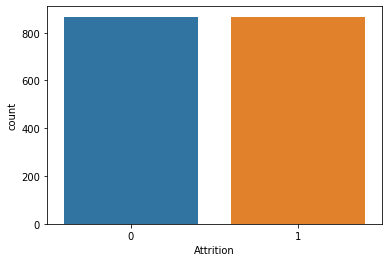

In [14]:
from imblearn.over_sampling import SMOTE

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

sm = SMOTE(random_state=42)
X_train,y_train=sm.fit_sample(X_train,y_train)

sns.countplot(y_train)

lrs=LogisticRegression()
lrs.fit(X_train,y_train)
y_pred = lrs.predict(X_test)
ytest_prob = lrs.predict_proba(X_test)[:,1]
print("Confusion:",confusion_matrix(y_test,y_pred))
print()
print("Accuracy Train: ",accuracy_score(y_train,lrs.predict(X_train)))
print("Accuracy Test:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))
print("AUC Test: ",roc_auc_score(y_test,ytest_prob))

### SMOTE SCALED DATA

Confusion: [[289  77]
 [ 25  50]]

Accuracy Train:  0.7831603229527105
Accuracy Test: 0.7687074829931972
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85       366
           1       0.39      0.67      0.50        75

    accuracy                           0.77       441
   macro avg       0.66      0.73      0.67       441
weighted avg       0.83      0.77      0.79       441

AUC Test:  0.8069216757741348


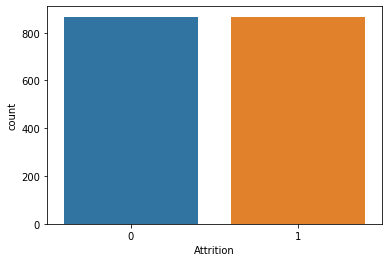

In [15]:
from imblearn.over_sampling import SMOTE

X_train,X_test,y_train,y_test=train_test_split(x_std,y,test_size=0.3,random_state=3)

smo = SMOTE(random_state=42)
X_train,y_train=smo.fit_sample(X_train,y_train)

sns.countplot(y_train)

lrs=LogisticRegression()
lrs.fit(X_train,y_train)
y_pred = lrs.predict(X_test)
ytest_prob = lrs.predict_proba(X_test)[:,1]
print("Confusion:",confusion_matrix(y_test,y_pred))
print()
print("Accuracy Train: ",accuracy_score(y_train,lrs.predict(X_train)))
print("Accuracy Test:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))
print("AUC Test: ",roc_auc_score(y_test,ytest_prob))

In [16]:
#Feature Selection using Feature Importance
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x,y)
rf.feature_importances_
dfr=pd.DataFrame()
dfr['rf']=rf.feature_importances_*100
dfr['col']=x.columns
dfr.sort_values(by='rf',ascending=False)['col'].values


array(['DailyRate', 'MonthlyRate', 'EmployeeNumber', 'OverTime',
       'DistanceFromHome', 'TotalWorkingYears', 'HourlyRate',
       'YearsAtCompany', 'PercentSalaryHike', 'NumCompaniesWorked',
       'EnvironmentSatisfaction', 'JobRole', 'YearsWithCurrManager',
       'YearsInCurrentRole', 'StockOptionLevel', 'JobLevel',
       'JobSatisfaction', 'TrainingTimesLastYear', 'JobInvolvement',
       'Age', 'WorkLifeBalance', 'YearsSinceLastPromotion',
       'EducationField', 'RelationshipSatisfaction', 'MaritalStatus',
       'Education', 'BusinessTravel', 'Department', 'Gender',
       'MonthlyIncome', 'PerformanceRating'], dtype=object)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,accuracy_score
x1=df1[['DailyRate', 'TotalWorkingYears', 'OverTime', 'MonthlyRate',
       'EmployeeNumber', 'HourlyRate', 'DistanceFromHome',
       'YearsAtCompany', 'PercentSalaryHike', 'JobRole',
       'NumCompaniesWorked', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'StockOptionLevel',
       'YearsInCurrentRole', 'RelationshipSatisfaction',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'EducationField',
       'YearsSinceLastPromotion', 'JobLevel', 'MaritalStatus',
       'JobInvolvement', 'Age', 'Education', 'BusinessTravel',
       'Department', 'Gender', 'MonthlyIncome', 'PerformanceRating']]
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=42,test_size=0.3)
ss=StandardScaler()
xtrains=ss.fit_transform(x_train)
xtests=ss.fit_transform(x_test)
lr2=LogisticRegression()
lr2.fit(xtrains,y_train)
y_pred1 = lr2.predict(xtests)
ytest_prob1 = lr2.predict_proba(xtests)[:,1]
print("Confusion:",confusion_matrix(y_test,y_pred))
print()
print("Accuracy Train: ",accuracy_score(y_train,lr2.predict(xtrains)))
print("Accuracy Test:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))
print("AUC Test: ",roc_auc_score(y_test,ytest_prob))



cm = pd.DataFrame(confusion_matrix(y_test,y_pred), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])

# calculating TP,TN,FP,FN
TN, FP, FN, TP = cm.iloc[0,0], cm.iloc[0,1], cm.iloc[1,0], cm.iloc[1,1]

# print values
print("True positives:", TP)
print("True negatives:", TN)
print("False positives (Type I error):", FP)
print("False negatives (Type II error):", FN)


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, roc_curve

# itereation results
description = "LR scaled selected"
misclassifications = FP + FN
type1 = FP
type2 = FN
precision = round(precision_score(y_test,y_pred),2)
recall = round(recall_score(y_test,y_pred),2)
accuracy_train = round(accuracy_score(y_train,lr2.predict(xtrains)),2)
accuracy_test = round(accuracy_score(y_test,y_pred),2)
f1 = round(f1_score(y_test,y_pred),2)
auc = round(roc_auc_score(y_test,ytest_prob),2)

df_results1 =pd.DataFrame(np.array([description,
                                     misclassifications,
                                     type1,
                                     type2,
                                     precision,
                                     recall,
                                     accuracy_train,
                                     accuracy_test,
                                     f1,
                                     auc]).reshape(1,-1), columns=['Description','Misclassifications','Type I errors','Type II errors','Precision','Recall','Accuracy_train','Accuracy_test','F1-score','ROC AUC'])

df_results1

Confusion: [[270 110]
 [ 44  17]]

Accuracy Train:  0.8746355685131195
Accuracy Test: 0.6507936507936508
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.71      0.78       380
           1       0.13      0.28      0.18        61

    accuracy                           0.65       441
   macro avg       0.50      0.49      0.48       441
weighted avg       0.76      0.65      0.70       441

AUC Test:  0.4720448662640207
True positives: 17
True negatives: 270
False positives (Type I error): 110
False negatives (Type II error): 44


,Description,Misclassifications,Type I errors,Type II errors,Precision,Recall,Accuracy_train,Accuracy_test,F1-score,ROC AUC
0,LR scaled selected,154,110,44,0.13,0.28,0.87,0.65,0.18,0.47


### SMOTE

In [18]:
x1=df1[['DailyRate', 'TotalWorkingYears', 'OverTime', 'MonthlyRate',
       'EmployeeNumber', 'HourlyRate', 'DistanceFromHome',
       'YearsAtCompany', 'PercentSalaryHike', 'JobRole',
       'NumCompaniesWorked', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'StockOptionLevel',
       'YearsInCurrentRole', 'RelationshipSatisfaction',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'EducationField',
       'YearsSinceLastPromotion', 'JobLevel', 'MaritalStatus',
       'JobInvolvement', 'Age', 'Education', 'BusinessTravel',
       'Department', 'Gender', 'MonthlyIncome', 'PerformanceRating']]
from imblearn.over_sampling import SMOTE

X_train,X_test,y_train,y_test=train_test_split(x1,y,test_size=0.3,random_state=3)

sm = SMOTE(random_state=42)
X_train,y_train=sm.fit_sample(X_train,y_train)


lrs=LogisticRegression()
lrs.fit(X_train,y_train)
y_pred = lrs.predict(X_test)
ytest_prob = lrs.predict_proba(X_test)[:,1]
print("Confusion:",confusion_matrix(y_test,y_pred))
print()
print("Accuracy Train: ",accuracy_score(y_train,lrs.predict(X_train)))
print("Accuracy Test:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))
print("AUC Test: ",roc_auc_score(y_test,ytest_prob))


cm = pd.DataFrame(confusion_matrix(y_test,y_pred), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])

# calculating TP,TN,FP,FN
TN, FP, FN, TP = cm.iloc[0,0], cm.iloc[0,1], cm.iloc[1,0], cm.iloc[1,1]

# print values
print("True positives:", TP)
print("True negatives:", TN)
print("False positives (Type I error):", FP)
print("False negatives (Type II error):", FN)


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, roc_curve

# itereation results
description = "LR Smote selected"
misclassifications = FP + FN
type1 = FP
type2 = FN
precision = round(precision_score(y_test,y_pred),2)
recall = round(recall_score(y_test,y_pred),2)
accuracy_train = round(accuracy_score(y_train,lrs.predict(X_train)),2)
accuracy_test = round(accuracy_score(y_test,y_pred),2)
f1 = round(f1_score(y_test,y_pred),2)
auc = round(roc_auc_score(y_test,ytest_prob),2)

df_results2 =pd.DataFrame(np.array([description,
                                     misclassifications,
                                     type1,
                                     type2,
                                     precision,
                                     recall,
                                     accuracy_train,
                                     accuracy_test,
                                     f1,
                                     auc]).reshape(1,-1), columns=['Description','Misclassifications','Type I errors','Type II errors','Precision','Recall','Accuracy_train','Accuracy_test','F1-score','ROC AUC'])

df_results2

Confusion: [[266 100]
 [ 36  39]]

Accuracy Train:  0.7399077277970012
Accuracy Test: 0.691609977324263
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.73      0.80       366
           1       0.28      0.52      0.36        75

    accuracy                           0.69       441
   macro avg       0.58      0.62      0.58       441
weighted avg       0.78      0.69      0.72       441

AUC Test:  0.6637158469945355
True positives: 39
True negatives: 266
False positives (Type I error): 100
False negatives (Type II error): 36


,Description,Misclassifications,Type I errors,Type II errors,Precision,Recall,Accuracy_train,Accuracy_test,F1-score,ROC AUC
0,LR Smote selected,136,100,36,0.28,0.52,0.74,0.69,0.36,0.66


### SMOTE SCALED DATA

In [19]:

#Scale the input
x1=df1[['DailyRate', 'TotalWorkingYears', 'OverTime', 'MonthlyRate',
       'EmployeeNumber', 'HourlyRate', 'DistanceFromHome',
       'YearsAtCompany', 'PercentSalaryHike', 'JobRole',
       'NumCompaniesWorked', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'StockOptionLevel',
       'YearsInCurrentRole', 'RelationshipSatisfaction',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'EducationField',
       'YearsSinceLastPromotion', 'JobLevel', 'MaritalStatus',
       'JobInvolvement', 'Age', 'Education', 'BusinessTravel',
       'Department', 'Gender', 'MonthlyIncome', 'PerformanceRating']]
y=df1['Attrition']
from imblearn.over_sampling import SMOTE
x_scaler=StandardScaler()
x_std1=x_scaler.fit_transform(x1)


X_train,X_test,y_train,y_test=train_test_split(x_std1,y,test_size=0.3,random_state=3)

sm = SMOTE(random_state=42)
X_train,y_train=sm.fit_sample(X_train,y_train)



lrs=LogisticRegression()
lrs.fit(X_train,y_train)
y_pred = lrs.predict(X_test)
ytest_prob = lrs.predict_proba(X_test)[:,1]
print("Confusion:",confusion_matrix(y_test,y_pred))
print()
print("Accuracy Train: ",accuracy_score(y_train,lrs.predict(X_train)))
print("Accuracy Test:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))
print("AUC Test: ",roc_auc_score(y_test,ytest_prob))


cm = pd.DataFrame(confusion_matrix(y_test,y_pred), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])

# calculating TP,TN,FP,FN
TN, FP, FN, TP = cm.iloc[0,0], cm.iloc[0,1], cm.iloc[1,0], cm.iloc[1,1]

# print values
print("True positives:", TP)
print("True negatives:", TN)
print("False positives (Type I error):", FP)
print("False negatives (Type II error):", FN)


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, roc_curve

# itereation results
description = "LR Smote scaled selected"
misclassifications = FP + FN
type1 = FP
type2 = FN
precision = round(precision_score(y_test,y_pred),2)
recall = round(recall_score(y_test,y_pred),2)
accuracy_train = round(accuracy_score(y_train,lrs.predict(X_train)),2)
accuracy_test = round(accuracy_score(y_test,y_pred),2)
f1 = round(f1_score(y_test,y_pred),2)
auc = round(roc_auc_score(y_test,ytest_prob),2)



df_results3 =pd.DataFrame(np.array([description,
                                     misclassifications,
                                     type1,
                                     type2,
                                     precision,
                                     recall,
                                     accuracy_train,
                                     accuracy_test,
                                     f1,
                                     auc]).reshape(1,-1), columns=['Description','Misclassifications','Type I errors','Type II errors','Precision','Recall','Accuracy_train','Accuracy_test','F1-score','ROC AUC'])

df_results3

Confusion: [[289  77]
 [ 25  50]]

Accuracy Train:  0.7831603229527105
Accuracy Test: 0.7687074829931972
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85       366
           1       0.39      0.67      0.50        75

    accuracy                           0.77       441
   macro avg       0.66      0.73      0.67       441
weighted avg       0.83      0.77      0.79       441

AUC Test:  0.8069216757741348
True positives: 50
True negatives: 289
False positives (Type I error): 77
False negatives (Type II error): 25


,Description,Misclassifications,Type I errors,Type II errors,Precision,Recall,Accuracy_train,Accuracy_test,F1-score,ROC AUC
0,LR Smote scaled selected,102,77,25,0.39,0.67,0.78,0.77,0.5,0.81


In [20]:
X_train.shape

(1734, 31)

In [21]:
#pip install featuretools

### KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
#Scale the input
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,accuracy_score
x1=df1[['DailyRate', 'TotalWorkingYears', 'OverTime', 'MonthlyRate',
       'EmployeeNumber', 'HourlyRate', 'DistanceFromHome',
       'YearsAtCompany', 'PercentSalaryHike', 'JobRole',
       'NumCompaniesWorked', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'StockOptionLevel',
       'YearsInCurrentRole', 'RelationshipSatisfaction',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'EducationField',
       'YearsSinceLastPromotion', 'JobLevel', 'MaritalStatus',
       'JobInvolvement', 'Age', 'Education', 'BusinessTravel',
       'Department', 'Gender', 'MonthlyIncome', 'PerformanceRating']]
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=42,test_size=0.3)
ss=StandardScaler()
xtrains=ss.fit_transform(x_train)
xtests=ss.fit_transform(x_test)
knn=KNeighborsClassifier()
knn.fit(xtrains,y_train)
y_pred = knn.predict(xtests)
ytest_prob = knn.predict_proba(xtests)[:,1]
print("Confusion:",confusion_matrix(y_test,y_pred))
print()
print("Accuracy Train: ",accuracy_score(y_train,knn.predict(xtrains)))
print("Accuracy Test:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))
print("AUC Test: ",roc_auc_score(y_test,ytest_prob))


cm = pd.DataFrame(confusion_matrix(y_test,y_pred), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])

# calculating TP,TN,FP,FN
TN, FP, FN, TP = cm.iloc[0,0], cm.iloc[0,1], cm.iloc[1,0], cm.iloc[1,1]

# print values
print("True positives:", TP)
print("True negatives:", TN)
print("False positives (Type I error):", FP)
print("False negatives (Type II error):", FN)


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, roc_curve

# itereation results
description = "KNN Scaled"
misclassifications = FP + FN
type1 = FP
type2 = FN
precision = round(precision_score(y_test,y_pred),2)
recall = round(recall_score(y_test,y_pred),2)
accuracy_train=round(accuracy_score(y_train,knn.predict(xtrains)),2)
accuracy_test = round(accuracy_score(y_test,y_pred),2)
f1 = round(f1_score(y_test,y_pred),2)
auc = round(roc_auc_score(y_test,ytest_prob),2)

df_results4 =pd.DataFrame(np.array([description,
                                     misclassifications,
                                     type1,
                                     type2,
                                     precision,
                                     recall,
                                     accuracy_train,
                                     accuracy_test,
                                     f1,
                                     auc]).reshape(1,-1), columns=['Description','Misclassifications','Type I errors','Type II errors','Precision','Recall','Accuracy_train','Accuracy_test','F1-score','ROC AUC'])

df_results4

Confusion: [[371   9]
 [ 53   8]]

Accuracy Train:  0.8678328474246841
Accuracy Test: 0.8594104308390023
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.92       380
           1       0.47      0.13      0.21        61

    accuracy                           0.86       441
   macro avg       0.67      0.55      0.56       441
weighted avg       0.82      0.86      0.82       441

AUC Test:  0.6468938740293355
True positives: 8
True negatives: 371
False positives (Type I error): 9
False negatives (Type II error): 53


,Description,Misclassifications,Type I errors,Type II errors,Precision,Recall,Accuracy_train,Accuracy_test,F1-score,ROC AUC
0,KNN Scaled,62,9,53,0.47,0.13,0.87,0.86,0.21,0.65


In [23]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
param={'n_neighbors':np.arange(1,70),'weights':['uniform','distance']}
kf =KFold(shuffle=True,n_splits=3,random_state=0)
grid=GridSearchCV(knn,param,cv=kf,scoring='roc_auc')
grid.fit(x_std,y)
grid.best_params_

{'n_neighbors': 60, 'weights': 'distance'}

In [24]:
from sklearn.neighbors import KNeighborsClassifier
#Scale the input
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,accuracy_score
x1=df1[['DailyRate', 'TotalWorkingYears', 'OverTime', 'MonthlyRate',
       'EmployeeNumber', 'HourlyRate', 'DistanceFromHome',
       'YearsAtCompany', 'PercentSalaryHike', 'JobRole',
       'NumCompaniesWorked', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'StockOptionLevel',
       'YearsInCurrentRole', 'RelationshipSatisfaction',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'EducationField',
       'YearsSinceLastPromotion', 'JobLevel', 'MaritalStatus',
       'JobInvolvement', 'Age', 'Education', 'BusinessTravel',
       'Department', 'Gender', 'MonthlyIncome', 'PerformanceRating']]
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=42,test_size=0.3)
ss=StandardScaler()
xtrains=ss.fit_transform(x_train)
xtests=ss.fit_transform(x_test)
knn=KNeighborsClassifier(n_neighbors= 66, weights= 'distance')
knn.fit(xtrains,y_train)
y_pred = knn.predict(xtests)
ytest_prob = knn.predict_proba(xtests)[:,1]
print("Confusion:",confusion_matrix(y_test,y_pred))
print()
print("Accuracy Train: ",accuracy_score(y_train,knn.predict(xtrains)))
print("Accuracy Test:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))
print("AUC Test: ",roc_auc_score(y_test,ytest_prob))


cm = pd.DataFrame(confusion_matrix(y_test,y_pred), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])

# calculating TP,TN,FP,FN
TN, FP, FN, TP = cm.iloc[0,0], cm.iloc[0,1], cm.iloc[1,0], cm.iloc[1,1]

# print values
print("True positives:", TP)
print("True negatives:", TN)
print("False positives (Type I error):", FP)
print("False negatives (Type II error):", FN)


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, roc_curve

# itereation results
description = "KNN Scaled hypertuned"
misclassifications = FP + FN
type1 = FP
type2 = FN
precision = round(precision_score(y_test,y_pred),2)
recall = round(recall_score(y_test,y_pred),2)
accuracy_train=accuracy_score(y_train,knn.predict(xtrains))
accuracy_test = round(accuracy_score(y_test,y_pred),2)
f1 = round(f1_score(y_test,y_pred),2)
auc = round(roc_auc_score(y_test,ytest_prob),2)

df_results5 =pd.DataFrame(np.array([description,
                                     misclassifications,
                                     type1,
                                     type2,
                                     precision,
                                     recall,
                                     accuracy_train,
                                     accuracy_test,
                                     f1,
                                     auc]).reshape(1,-1), columns=['Description','Misclassifications','Type I errors','Type II errors','Precision','Recall','Accuracy_train','Accuracy_test','F1-score','ROC AUC'])

df_results5


Confusion: [[380   0]
 [ 61   0]]

Accuracy Train:  1.0
Accuracy Test: 0.8616780045351474
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93       380
           1       0.00      0.00      0.00        61

    accuracy                           0.86       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.74      0.86      0.80       441

AUC Test:  0.7129853321829163
True positives: 0
True negatives: 380
False positives (Type I error): 0
False negatives (Type II error): 61


,Description,Misclassifications,Type I errors,Type II errors,Precision,Recall,Accuracy_train,Accuracy_test,F1-score,ROC AUC
0,KNN Scaled hypertuned,61,0,61,0.0,0.0,1.0,0.86,0.0,0.71


### NB

In [25]:

from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(xtrains,y_train)
y_pred = NB.predict(xtests)
ytest_prob = NB.predict_proba(xtests)[:,1]
print("Confusion:",confusion_matrix(y_test,y_pred))
print()
print("Accuracy Train: ",accuracy_score(y_train,NB.predict(xtrains)))
print("Accuracy Test:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))
print("AUC Test: ",roc_auc_score(y_test,ytest_prob))

Confusion: [[306  74]
 [ 28  33]]

Accuracy Train:  0.7803692905733722
Accuracy Test: 0.7687074829931972
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.81      0.86       380
           1       0.31      0.54      0.39        61

    accuracy                           0.77       441
   macro avg       0.61      0.67      0.62       441
weighted avg       0.83      0.77      0.79       441

AUC Test:  0.7110871440897325


In [26]:
from sklearn.neighbors import KNeighborsClassifier
#Scale the input
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,accuracy_score
x1=df1[['DailyRate', 'TotalWorkingYears', 'OverTime', 'MonthlyRate',
       'EmployeeNumber', 'HourlyRate', 'DistanceFromHome',
       'YearsAtCompany', 'PercentSalaryHike', 'JobRole',
       'NumCompaniesWorked', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'StockOptionLevel',
       'YearsInCurrentRole', 'RelationshipSatisfaction',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'EducationField',
       'YearsSinceLastPromotion', 'JobLevel', 'MaritalStatus',
       'JobInvolvement', 'Age', 'Education', 'BusinessTravel',
       'Department', 'Gender', 'MonthlyIncome', 'PerformanceRating']]
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=42,test_size=0.3)
ss=StandardScaler()
xtrains=ss.fit_transform(x_train)
xtests=ss.fit_transform(x_test)
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(xtrains,y_train)
y_pred = NB.predict(xtests)
ytest_prob = NB.predict_proba(xtests)[:,1]
print("Confusion:",confusion_matrix(y_test,y_pred))
print()
print("Accuracy Train: ",accuracy_score(y_train,NB.predict(xtrains)))
print("Accuracy Test:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))
print("AUC Test: ",roc_auc_score(y_test,ytest_prob))


cm = pd.DataFrame(confusion_matrix(y_test,y_pred), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])

# calculating TP,TN,FP,FN
TN, FP, FN, TP = cm.iloc[0,0], cm.iloc[0,1], cm.iloc[1,0], cm.iloc[1,1]

# print values
print("True positives:", TP)
print("True negatives:", TN)
print("False positives (Type I error):", FP)
print("False negatives (Type II error):", FN)


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, roc_curve

# itereation results
description = "NB Scaled "
misclassifications = FP + FN
type1 = FP
type2 = FN
precision = round(precision_score(y_test,y_pred),2)
recall = round(recall_score(y_test,y_pred),2)
accuracy_train = round(accuracy_score(y_train,NB.predict(xtrains),2))
accuracy_test = round(accuracy_score(y_test,y_pred),2)
f1 = round(f1_score(y_test,y_pred),2)
auc = round(roc_auc_score(y_test,ytest_prob),2)

df_results6 =pd.DataFrame(np.array([description,
                                     misclassifications,
                                     type1,
                                     type2,
                                     precision,
                                     recall,
                                     accuracy_train,
                                     accuracy_test,
                                     f1,
                                     auc]).reshape(1,-1), columns=['Description','Misclassifications','Type I errors','Type II errors','Precision','Recall','Accuracy_train','Accuracy_test','F1-score','ROC AUC'])

df_results6


Confusion: [[306  74]
 [ 28  33]]

Accuracy Train:  0.7803692905733722
Accuracy Test: 0.7687074829931972
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.81      0.86       380
           1       0.31      0.54      0.39        61

    accuracy                           0.77       441
   macro avg       0.61      0.67      0.62       441
weighted avg       0.83      0.77      0.79       441

AUC Test:  0.7110871440897325
True positives: 33
True negatives: 306
False positives (Type I error): 74
False negatives (Type II error): 28


,Description,Misclassifications,Type I errors,Type II errors,Precision,Recall,Accuracy_train,Accuracy_test,F1-score,ROC AUC
0,NB Scaled,102,74,28,0.31,0.54,1.0,0.77,0.39,0.71


### Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt_model=DecisionTreeClassifier(random_state=0) #Fully Grown DT
#Fully grown Decision Tree
dt_model.fit(xtrains,y_train)
y_pred = dt_model.predict(xtests)
ytest_prob = dt_model.predict_proba(xtests)[:,1]
print("Confusion:",confusion_matrix(y_test,y_pred))
print()
print("Accuracy Train: ",accuracy_score(y_train,dt_model.predict(xtrains)))
print("Accuracy Test:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))
print("AUC Test: ",roc_auc_score(y_test,ytest_prob))

Confusion: [[313  67]
 [ 41  20]]

Accuracy Train:  1.0
Accuracy Test: 0.7551020408163265
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       380
           1       0.23      0.33      0.27        61

    accuracy                           0.76       441
   macro avg       0.56      0.58      0.56       441
weighted avg       0.79      0.76      0.77       441

AUC Test:  0.575776531492666


In [29]:
#Perform Grid Search Method to find the optimal max_depth size
from sklearn.model_selection import GridSearchCV
parameter={'max_depth':np.arange(1,10),'criterion' : ['entropy','gini'],'min_samples_leaf':np.arange(3,20)}
kf=KFold(shuffle=True,n_splits=3,random_state=0)
GS=GridSearchCV(dt_model,parameter,cv=kf,scoring='roc_auc')
GS.fit(x_std,y)
GS.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 19}

In [30]:
dt_reg=DecisionTreeClassifier(max_depth=4,criterion='entropy',min_samples_leaf=19,random_state=0)##Regularised
#Regularised Decision Tree
dt_reg.fit(xtrains,y_train)
y_pred = dt_reg.predict(xtests)
ytest_prob = dt_reg.predict_proba(xtests)[:,1]
print("Confusion:",confusion_matrix(y_test,y_pred))
print()
print("Accuracy Train: ",accuracy_score(y_train,dt_reg.predict(xtrains)))
print("Accuracy Test:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))
print("AUC Test: ",roc_auc_score(y_test,ytest_prob))

Confusion: [[363  17]
 [ 44  17]]

Accuracy Train:  0.8668610301263362
Accuracy Test: 0.8616780045351474
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       380
           1       0.50      0.28      0.36        61

    accuracy                           0.86       441
   macro avg       0.70      0.62      0.64       441
weighted avg       0.84      0.86      0.84       441

AUC Test:  0.717320966350302


In [31]:
#Scale the input
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,accuracy_score
x1=df1[['DailyRate', 'TotalWorkingYears', 'OverTime', 'MonthlyRate',
       'EmployeeNumber', 'HourlyRate', 'DistanceFromHome',
       'YearsAtCompany', 'PercentSalaryHike', 'JobRole',
       'NumCompaniesWorked', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'StockOptionLevel',
       'YearsInCurrentRole', 'RelationshipSatisfaction',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'EducationField',
       'YearsSinceLastPromotion', 'JobLevel', 'MaritalStatus',
       'JobInvolvement', 'Age', 'Education', 'BusinessTravel',
       'Department', 'Gender', 'MonthlyIncome', 'PerformanceRating']]
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=42,test_size=0.3)
ss=StandardScaler()
xtrains=ss.fit_transform(x_train)
xtests=ss.fit_transform(x_test)
from sklearn.naive_bayes import GaussianNB
dt_model=DecisionTreeClassifier(random_state=0) #Fully Grown DT
#Fully grown Decision Tree
dt_model.fit(xtrains,y_train)
y_pred = dt_model.predict(xtests)
ytest_prob = dt_model.predict_proba(xtests)[:,1]
print("Confusion:",confusion_matrix(y_test,y_pred))
print()
print("Accuracy Train: ",accuracy_score(y_train,dt_model.predict(xtrains)))
print("Accuracy Test:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))
print("AUC Test: ",roc_auc_score(y_test,ytest_prob))


cm = pd.DataFrame(confusion_matrix(y_test,y_pred), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])

# calculating TP,TN,FP,FN
TN, FP, FN, TP = cm.iloc[0,0], cm.iloc[0,1], cm.iloc[1,0], cm.iloc[1,1]

# print values
print("True positives:", TP)
print("True negatives:", TN)
print("False positives (Type I error):", FP)
print("False negatives (Type II error):", FN)


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, roc_curve

# itereation results
description = "DT"
misclassifications = FP + FN
type1 = FP
type2 = FN
precision = round(precision_score(y_test,y_pred),2)
recall = round(recall_score(y_test,y_pred),2)
accuracy_train = round(accuracy_score(y_test,y_pred),2)
accuracy_test = round(accuracy_score(y_test,y_pred),2)
f1 = round(f1_score(y_test,y_pred),2)
auc = round(roc_auc_score(y_test,ytest_prob),2)

df_results7 =pd.DataFrame(np.array([description,
                                     misclassifications,
                                     type1,
                                     type2,
                                     precision,
                                     recall,
                                     accuracy_train,
                                     accuracy_test,
                                     f1,
                                     auc]).reshape(1,-1), columns=['Description','Misclassifications','Type I errors','Type II errors','Precision','Recall','Accuracy_train','Accuracy_test','F1-score','ROC AUC'])

df_results7


Confusion: [[313  67]
 [ 41  20]]

Accuracy Train:  1.0
Accuracy Test: 0.7551020408163265
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       380
           1       0.23      0.33      0.27        61

    accuracy                           0.76       441
   macro avg       0.56      0.58      0.56       441
weighted avg       0.79      0.76      0.77       441

AUC Test:  0.575776531492666
True positives: 20
True negatives: 313
False positives (Type I error): 67
False negatives (Type II error): 41


,Description,Misclassifications,Type I errors,Type II errors,Precision,Recall,Accuracy_train,Accuracy_test,F1-score,ROC AUC
0,DT,108,67,41,0.23,0.33,0.76,0.76,0.27,0.58


In [32]:
#Scale the input
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,accuracy_score
x1=df1[['DailyRate', 'TotalWorkingYears', 'OverTime', 'MonthlyRate',
       'EmployeeNumber', 'HourlyRate', 'DistanceFromHome',
       'YearsAtCompany', 'PercentSalaryHike', 'JobRole',
       'NumCompaniesWorked', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'StockOptionLevel',
       'YearsInCurrentRole', 'RelationshipSatisfaction',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'EducationField',
       'YearsSinceLastPromotion', 'JobLevel', 'MaritalStatus',
       'JobInvolvement', 'Age', 'Education', 'BusinessTravel',
       'Department', 'Gender', 'MonthlyIncome', 'PerformanceRating']]
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=42,test_size=0.3)
ss=StandardScaler()
xtrains=ss.fit_transform(x_train)
xtests=ss.fit_transform(x_test)
dt_reg=DecisionTreeClassifier(max_depth=4,criterion='entropy',min_samples_leaf=19,random_state=0)##Regularised
#Regularised Decision Tree
dt_reg.fit(xtrains,y_train)
y_pred = dt_reg.predict(xtests)
ytest_prob = dt_reg.predict_proba(xtests)[:,1]
print("Confusion:",confusion_matrix(y_test,y_pred))
print()
print("Accuracy Train: ",accuracy_score(y_train,dt_reg.predict(xtrains)))
print("Accuracy Test:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))
print("AUC Test: ",roc_auc_score(y_test,ytest_prob))


cm = pd.DataFrame(confusion_matrix(y_test,y_pred), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])

# calculating TP,TN,FP,FN
TN, FP, FN, TP = cm.iloc[0,0], cm.iloc[0,1], cm.iloc[1,0], cm.iloc[1,1]

# print values
print("True positives:", TP)
print("True negatives:", TN)
print("False positives (Type I error):", FP)
print("False negatives (Type II error):", FN)


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, roc_curve

# itereation results
description = "DT reg"
misclassifications = FP + FN
type1 = FP
type2 = FN
precision = round(precision_score(y_test,y_pred),2)
recall = round(recall_score(y_test,y_pred),2)
accuracy_train = round(accuracy_score(y_test,y_pred),2)
accuracy_test = round(accuracy_score(y_test,y_pred),2)
f1 = round(f1_score(y_test,y_pred),2)
auc = round(roc_auc_score(y_test,ytest_prob),2)

df_results8 =pd.DataFrame(np.array([description,
                                     misclassifications,
                                     type1,
                                     type2,
                                     precision,
                                     recall,
                                     accuracy_train,
                                     accuracy_test,
                                     f1,
                                     auc]).reshape(1,-1), columns=['Description','Misclassifications','Type I errors','Type II errors','Precision','Recall','Accuracy_train','Accuracy_test','F1-score','ROC AUC'])

df_results8


Confusion: [[363  17]
 [ 44  17]]

Accuracy Train:  0.8668610301263362
Accuracy Test: 0.8616780045351474
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       380
           1       0.50      0.28      0.36        61

    accuracy                           0.86       441
   macro avg       0.70      0.62      0.64       441
weighted avg       0.84      0.86      0.84       441

AUC Test:  0.717320966350302
True positives: 17
True negatives: 363
False positives (Type I error): 17
False negatives (Type II error): 44


,Description,Misclassifications,Type I errors,Type II errors,Precision,Recall,Accuracy_train,Accuracy_test,F1-score,ROC AUC
0,DT reg,61,17,44,0.5,0.28,0.86,0.86,0.36,0.72


### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(xtrains,y_train)
y_pred = rfc.predict(xtests)
ytest_prob = rfc.predict_proba(xtests)[:,1]
print("Confusion:",confusion_matrix(y_test,y_pred))
print()
print("Accuracy Train: ",accuracy_score(y_train,rfc.predict(xtrains)))
print("Accuracy Test:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))
print("AUC Test: ",roc_auc_score(y_test,ytest_prob))

Confusion: [[376   4]
 [ 56   5]]

Accuracy Train:  1.0
Accuracy Test: 0.8639455782312925
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.56      0.08      0.14        61

    accuracy                           0.86       441
   macro avg       0.71      0.54      0.53       441
weighted avg       0.83      0.86      0.82       441

AUC Test:  0.7752804141501295


In [34]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

rfc_tunned=RandomForestClassifier(n_estimators=20,random_state=0)
params={'n_estimators':sp_randint(1,20),
        'max_features':sp_randint(1,6),
        'max_depth':sp_randint(2,10),
        'criterion':['gini','entropy']}

rsearch_rfc=RandomizedSearchCV(rfc_tunned,params,cv=3,scoring='roc_auc',n_jobs=-1,random_state=0)

rsearch_rfc.fit(x_std,y)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_estimators=20,
                                                    random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028BF76EA4C8>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028BF76925C8>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028BF765C388>},
                   random_state=0, scoring='roc_auc')

In [35]:
rsearch_rfc.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_features': 1, 'n_estimators': 18}

In [36]:
rfc_tunned=RandomForestClassifier(**rsearch_rfc.best_params_,random_state=0)

rfc_tunned.fit(xtrains,y_train)
y_pred = rfc_tunned.predict(xtests)
ytest_prob = rfc_tunned.predict_proba(xtests)[:,1]
print("Confusion:",confusion_matrix(y_test,y_pred))
print()
print("Accuracy Train: ",accuracy_score(y_train,rfc_tunned.predict(xtrains)))
print("Accuracy Test:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))
print("AUC Test: ",roc_auc_score(y_test,ytest_prob))

Confusion: [[380   0]
 [ 61   0]]

Accuracy Train:  0.8289601554907677
Accuracy Test: 0.8616780045351474
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93       380
           1       0.00      0.00      0.00        61

    accuracy                           0.86       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.74      0.86      0.80       441

AUC Test:  0.7248058671268335


In [37]:
#Scale the input
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,accuracy_score
x1=df1[['DailyRate', 'TotalWorkingYears', 'OverTime', 'MonthlyRate',
       'EmployeeNumber', 'HourlyRate', 'DistanceFromHome',
       'YearsAtCompany', 'PercentSalaryHike', 'JobRole',
       'NumCompaniesWorked', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'StockOptionLevel',
       'YearsInCurrentRole', 'RelationshipSatisfaction',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'EducationField',
       'YearsSinceLastPromotion', 'JobLevel', 'MaritalStatus',
       'JobInvolvement', 'Age', 'Education', 'BusinessTravel',
       'Department', 'Gender', 'MonthlyIncome', 'PerformanceRating']]
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=42,test_size=0.3)
ss=StandardScaler()
xtrains=ss.fit_transform(x_train)
xtests=ss.fit_transform(x_test)
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(xtrains,y_train)
y_pred = rfc.predict(xtests)
ytest_prob = rfc.predict_proba(xtests)[:,1]
print("Confusion:",confusion_matrix(y_test,y_pred))
print()
print("Accuracy Train: ",accuracy_score(y_train,rfc.predict(xtrains)))
print("Accuracy Test:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))
print("AUC Test: ",roc_auc_score(y_test,ytest_prob))


cm = pd.DataFrame(confusion_matrix(y_test,y_pred), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])

# calculating TP,TN,FP,FN
TN, FP, FN, TP = cm.iloc[0,0], cm.iloc[0,1], cm.iloc[1,0], cm.iloc[1,1]

# print values
print("True positives:", TP)
print("True negatives:", TN)
print("False positives (Type I error):", FP)
print("False negatives (Type II error):", FN)


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, roc_curve

# itereation results
description = "RF"
misclassifications = FP + FN
type1 = FP
type2 = FN
precision = round(precision_score(y_test,y_pred),2)
recall = round(recall_score(y_test,y_pred),2)
accuracy_train = round(accuracy_score(y_train,rfc.predict(xtrains)),2)
accuracy_test = round(accuracy_score(y_test,y_pred),2)
f1 = round(f1_score(y_test,y_pred),2)
auc = round(roc_auc_score(y_test,y_pred),2)

df_results9 =pd.DataFrame(np.array([description,
                                     misclassifications,
                                     type1,
                                     type2,
                                     precision,
                                     recall,
                                    accuracy_train,
                                     accuracy_test,
                                     f1,
                                     auc]).reshape(1,-1), columns=['Description','Misclassifications','Type I errors','Type II errors','Precision','Recall','Accuracy_train','Accuracy_test','F1-score','ROC AUC'])

df_results9


Confusion: [[375   5]
 [ 56   5]]

Accuracy Train:  1.0
Accuracy Test: 0.8616780045351474
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.92       380
           1       0.50      0.08      0.14        61

    accuracy                           0.86       441
   macro avg       0.69      0.53      0.53       441
weighted avg       0.82      0.86      0.82       441

AUC Test:  0.7767471958584986
True positives: 5
True negatives: 375
False positives (Type I error): 5
False negatives (Type II error): 56


,Description,Misclassifications,Type I errors,Type II errors,Precision,Recall,Accuracy_train,Accuracy_test,F1-score,ROC AUC
0,RF,61,5,56,0.5,0.08,1.0,0.86,0.14,0.53


In [38]:
#Scale the input
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,accuracy_score
x1=df1[['DailyRate', 'TotalWorkingYears', 'OverTime', 'MonthlyRate',
       'EmployeeNumber', 'HourlyRate', 'DistanceFromHome',
       'YearsAtCompany', 'PercentSalaryHike', 'JobRole',
       'NumCompaniesWorked', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'StockOptionLevel',
       'YearsInCurrentRole', 'RelationshipSatisfaction',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'EducationField',
       'YearsSinceLastPromotion', 'JobLevel', 'MaritalStatus',
       'JobInvolvement', 'Age', 'Education', 'BusinessTravel',
       'Department', 'Gender', 'MonthlyIncome', 'PerformanceRating']]
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=42,test_size=0.3)
ss=StandardScaler()
xtrains=ss.fit_transform(x_train)
xtests=ss.fit_transform(x_test)
from sklearn.ensemble import RandomForestClassifier
rfc_tunned=RandomForestClassifier(**rsearch_rfc.best_params_,random_state=0)
rfc_tunned.fit(xtrains,y_train)
y_pred = rfc_tunned.predict(xtests)
ytest_prob = rfc_tunned.predict_proba(xtests)[:,1]
print("Confusion:",confusion_matrix(y_test,y_pred))
print()
print("Accuracy Train: ",accuracy_score(y_train,rfc_tunned.predict(xtrains)))
print("Accuracy Test:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))
print("AUC Test: ",roc_auc_score(y_test,ytest_prob))


cm = pd.DataFrame(confusion_matrix(y_test,y_pred), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])

# calculating TP,TN,FP,FN
TN, FP, FN, TP = cm.iloc[0,0], cm.iloc[0,1], cm.iloc[1,0], cm.iloc[1,1]

# print values
print("True positives:", TP)
print("True negatives:", TN)
print("False positives (Type I error):", FP)
print("False negatives (Type II error):", FN)


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, roc_curve

# itereation results
description = "RF tuned"
misclassifications = FP + FN
type1 = FP
type2 = FN
precision = round(precision_score(y_test,y_pred),2)
recall = round(recall_score(y_test,y_pred),2)
accuracy_train = round(accuracy_score(y_train,rfc_tunned.predict(xtrains)),2)
accuracy_test = round(accuracy_score(y_test,y_pred),2)
f1 = round(f1_score(y_test,y_pred),2)
auc = round(roc_auc_score(y_test,ytest_prob),2)

df_results10 =pd.DataFrame(np.array([description,
                                     misclassifications,
                                     type1,
                                     type2,
                                     precision,
                                     recall,
                                     accuracy_train,
                                      accuracy_test,
                                     f1,
                                     auc]).reshape(1,-1), columns=['Description','Misclassifications','Type I errors','Type II errors','Precision','Recall','Accuracy_train','Accuracy_test','F1-score','ROC AUC'])

df_results10


Confusion: [[380   0]
 [ 61   0]]

Accuracy Train:  0.8289601554907677
Accuracy Test: 0.8616780045351474
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93       380
           1       0.00      0.00      0.00        61

    accuracy                           0.86       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.74      0.86      0.80       441

AUC Test:  0.7248058671268335
True positives: 0
True negatives: 380
False positives (Type I error): 0
False negatives (Type II error): 61


,Description,Misclassifications,Type I errors,Type II errors,Precision,Recall,Accuracy_train,Accuracy_test,F1-score,ROC AUC
0,RF tuned,61,0,61,0.0,0.0,0.83,0.86,0.0,0.72


### Summary

In [39]:
df_results=pd.DataFrame()
df_results=df_results.append(df_results0, ignore_index=True)
df_results=df_results.append(df_results1, ignore_index=True)
df_results=df_results.append(df_results2, ignore_index=True)
df_results=df_results.append(df_results3, ignore_index=True)
df_results=df_results.append(df_results4, ignore_index=True)
df_results=df_results.append(df_results5, ignore_index=True)
df_results=df_results.append(df_results6, ignore_index=True)
df_results=df_results.append(df_results7, ignore_index=True)
df_results=df_results.append(df_results8, ignore_index=True)
df_results=df_results.append(df_results9, ignore_index=True)
df_results=df_results.append(df_results10, ignore_index=True)


df_results

,Description,Misclassifications,Type I errors,Type II errors,Precision,Recall,Accuracy_train,Accuracy_test,F1-score,ROC AUC
0,LR Scaled,53,8,45,0.79,0.4,0.87,0.88,0.53,0.81
1,LR scaled selected,154,110,44,0.13,0.28,0.87,0.65,0.18,0.47
2,LR Smote selected,136,100,36,0.28,0.52,0.74,0.69,0.36,0.66
3,LR Smote scaled selected,102,77,25,0.39,0.67,0.78,0.77,0.5,0.81
4,KNN Scaled,62,9,53,0.47,0.13,0.87,0.86,0.21,0.65
5,KNN Scaled hypertuned,61,0,61,0.0,0.0,1.0,0.86,0.0,0.71
6,NB Scaled,102,74,28,0.31,0.54,1.0,0.77,0.39,0.71
7,DT,108,67,41,0.23,0.33,0.76,0.76,0.27,0.58
8,DT reg,61,17,44,0.5,0.28,0.86,0.86,0.36,0.72
9,RF,61,5,56,0.5,0.08,1.0,0.86,0.14,0.53
